In [90]:
#importing the required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import numpy as np
from sklearn.metrics import r2_score
import warnings

In [91]:
warnings.filterwarnings('ignore')

In [15]:
BB=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')

In [16]:
BB.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [18]:
BB.info(),BB.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


(None, (30, 17))

In [19]:
BB.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


# Exploratory Data Analysis

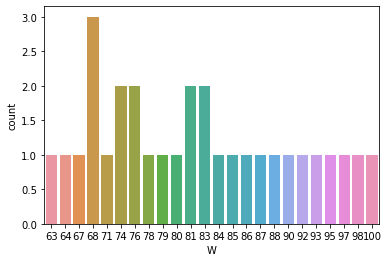

In [50]:
sns.countplot(x='W',data=BB)
plt.show()

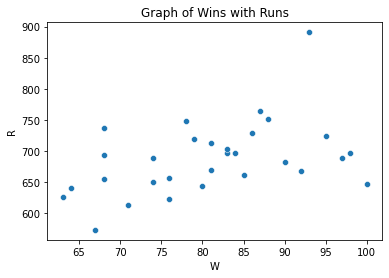

In [49]:
sns.scatterplot(x='W',y='R',data=BB)
plt.title('Graph of Wins with Runs')
plt.show()

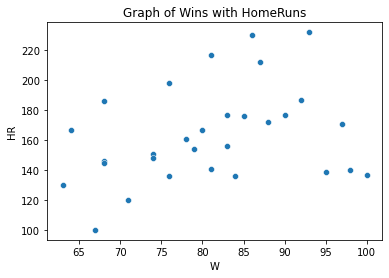

In [29]:
sns.scatterplot(x='W',y='HR',data=BB)
plt.title('Graph of Wins with HomeRuns')
plt.show()

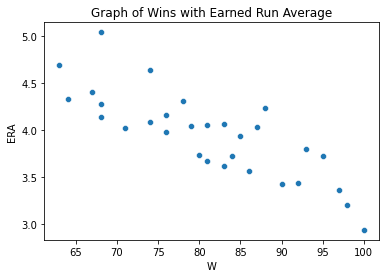

In [35]:
sns.scatterplot(x='W',y='ERA',data=BB)
plt.title('Graph of Wins with Earned Run Average')
plt.show()

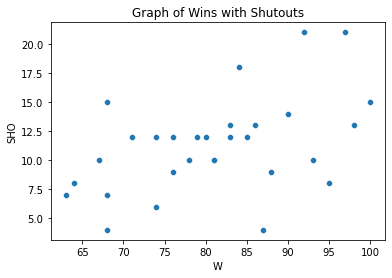

In [33]:
sns.scatterplot(x='W',y='SHO',data=BB)
plt.title('Graph of Wins with Shutouts')
plt.show()

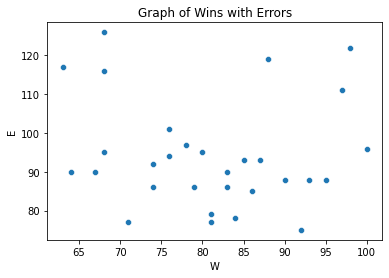

In [36]:
sns.scatterplot(x='W',y='E',data=BB)
plt.title('Graph of Wins with Errors')
plt.show()

In [37]:
BB.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

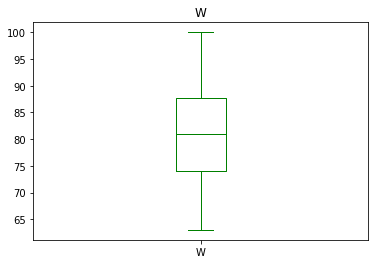

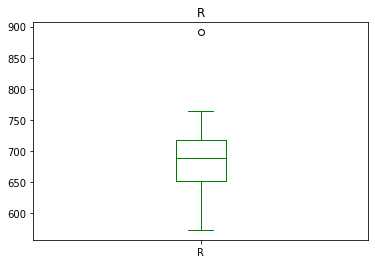

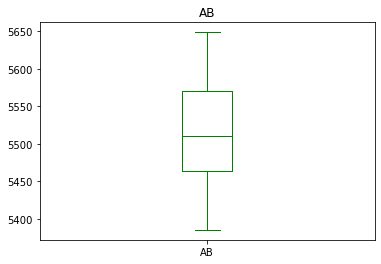

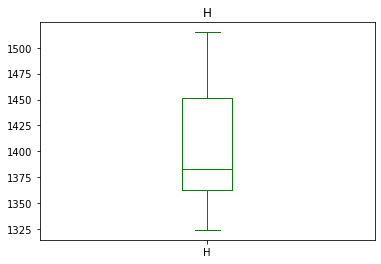

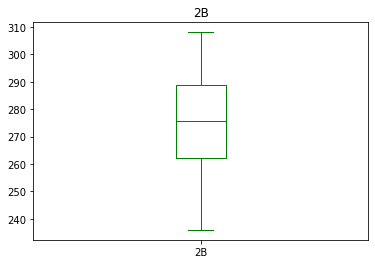

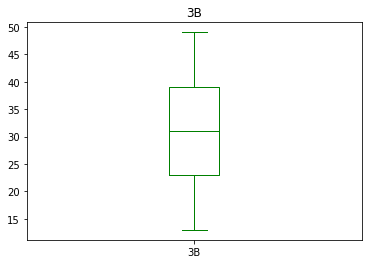

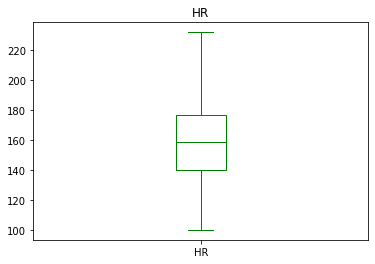

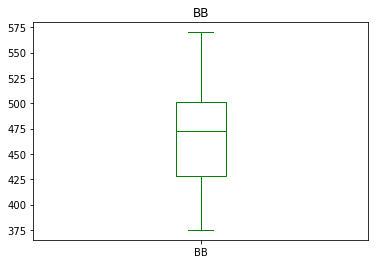

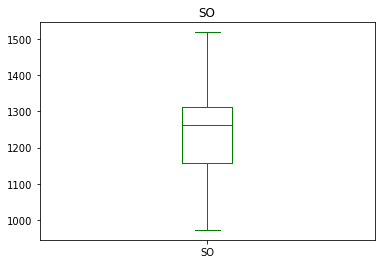

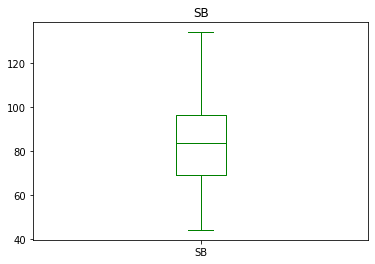

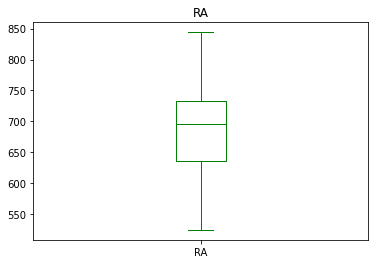

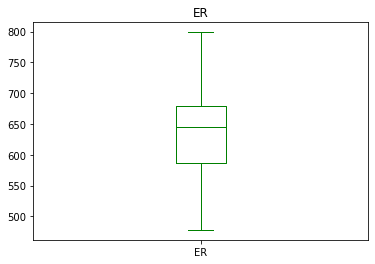

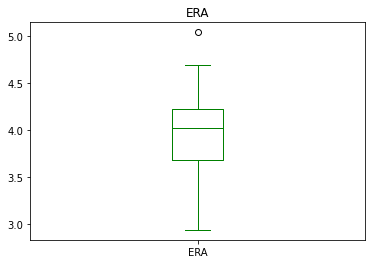

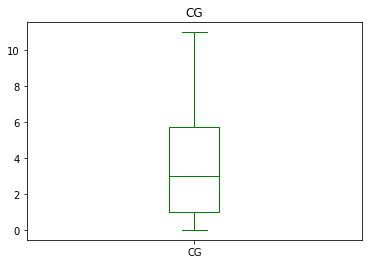

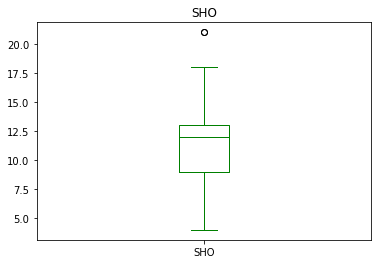

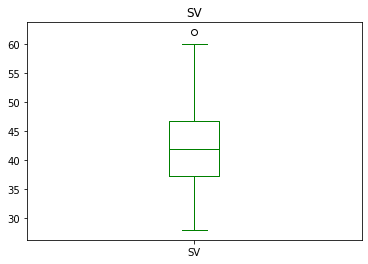

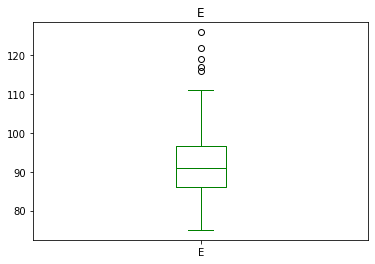

In [42]:
for i in BB.columns:
    BB[i].plot(kind='box',color='green')
    plt.title(str(i))
    plt.show()

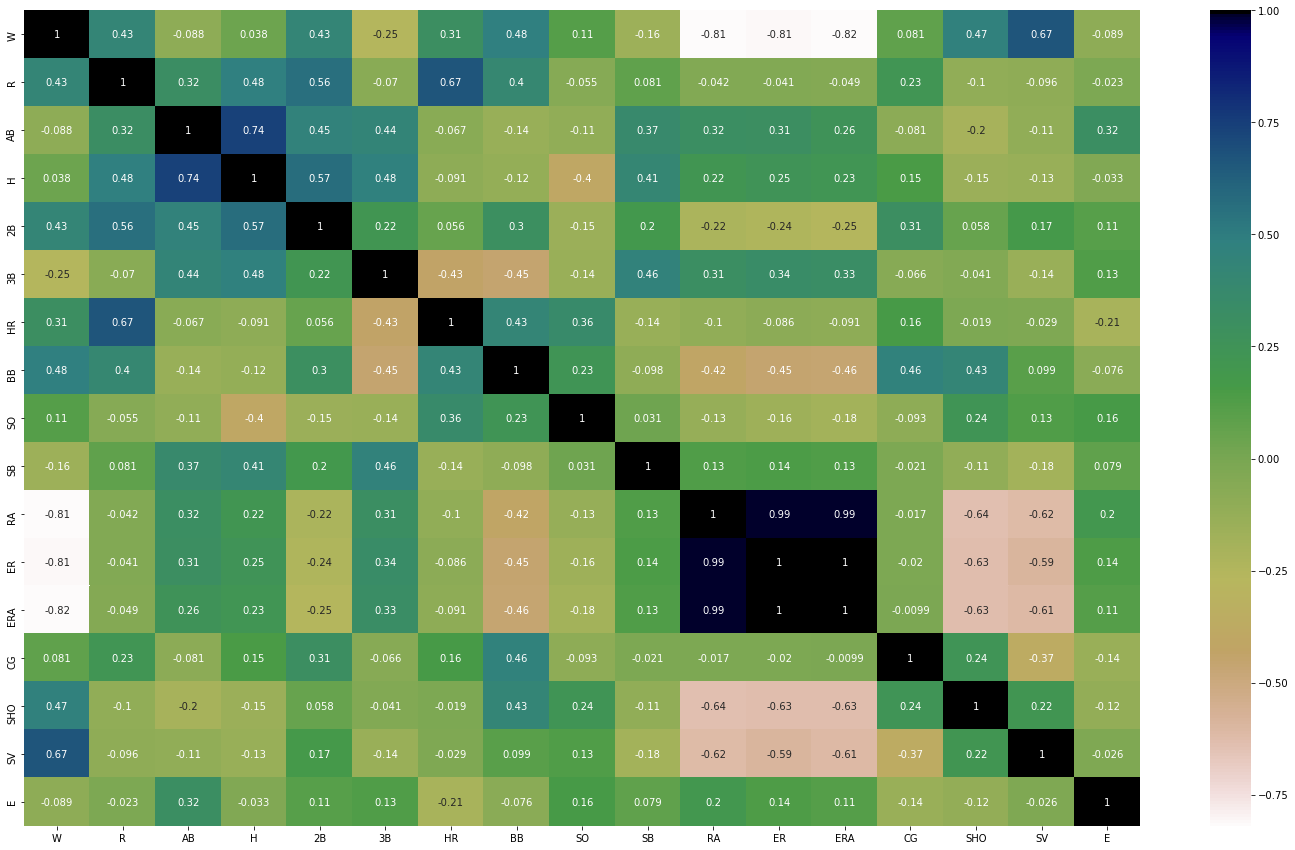

In [57]:
plt.figure(figsize=(25,15))
sns.heatmap(BB.corr(),cmap="gist_earth_r",annot=True)
plt.show()

Wins has a good negative correlation with RA ,ER,and ERA
whereas has a good positive correlation with SV,BB,SHO

# Data Cleaning

Dropping the which are least correlated with wins

In [60]:
BB.drop(['E','AB',"H"],axis=1,inplace=True)

In [61]:
z=zscore(BB)

In [64]:
threshold=3
z=np.absolute(z)
np.where(z>threshold)

(array([5], dtype=int64), array([1], dtype=int64))

In [65]:
BB.drop([5],inplace=True)

In [67]:
BB.head(),BB.shape

(    W    R   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  SHO  SV
 0  95  724  300  42  139  383   973  104  641  601  3.73   2    8  56
 1  83  696  277  44  156  439  1264   70  700  653  4.07   2   12  45
 2  81  669  303  29  141  533  1157   86  640  584  3.67  11   10  38
 3  76  622  260  27  136  404  1231   68  701  643  3.98   7    9  37
 4  74  689  289  49  151  455  1259   83  803  746  4.64   7   12  35,
 (29, 14))

Separating the Data into features and Vectors

In [68]:
x=BB.iloc[:,1:]
y=BB.iloc[:,0]

In [112]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.4,random_state=43)
xtrain.shape

(17, 13)

# Building the Model

**Linear Regression**

In [113]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(xtrain,ytrain)
pred=lr.predict(xtest)
print(r2_score(pred,ytest)*100,'%')

70.56107538621939 %


Ridge Regression

In [114]:
from sklearn.linear_model import Ridge
rr = Ridge()
rr.fit(xtrain,ytrain)
pred1=rr.predict(xtest)
print(r2_score(pred1,ytest)*100,'%')

69.02629670602727 %


Lasso Regression

In [115]:
from sklearn.linear_model import Lasso
l = Lasso()
l.fit(xtrain,ytrain)
pred2=l.predict(xtest)
print(r2_score(pred2,ytest)*100,'%')

78.59030098598134 %


 DecisionTreeRegressor

In [116]:
from sklearn.tree import DecisionTreeRegressor
dt =DecisionTreeRegressor()
dt.fit(xtrain,ytrain)
pred3=dt.predict(xtest)
print(r2_score(pred3,ytest)*100,'%')

13.07324984232816 %


In [118]:
from sklearn.metrics import mean_squared_error
print('Mean Squared error of DecisionTreeClassifier is:',mean_squared_error(ytest,pred))
print('Mean Squared error of RandomForestClassifier is:',mean_squared_error(ytest,pred2))

Mean Squared error of DecisionTreeClassifier is: 30.72220858853174
Mean Squared error of RandomForestClassifier is: 19.73056134776701


Taking LassoRegression as the final model

In [121]:
import pickle
filename='Baseball_analysis.pkl'
pickle.dump(l,open(filename,'wb'))

# Conclusion

In [124]:
print(r2_score(l.predict(xtrain),ytrain)*100,"%")

97.3339540120627 %
